In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

#Read data in dataframe
data = pd.read_csv('/Users/Mru/Downloads/movie_metadata.csv')
data_clean = data.dropna()
#Show first five records in dataframe
data_clean.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


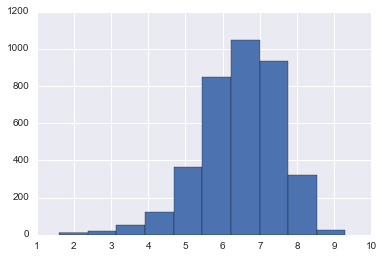

In [58]:
#plot simple histogram for movies and imdb_score
plt.figure();
data_clean['imdb_score'].hist()
plt.show()

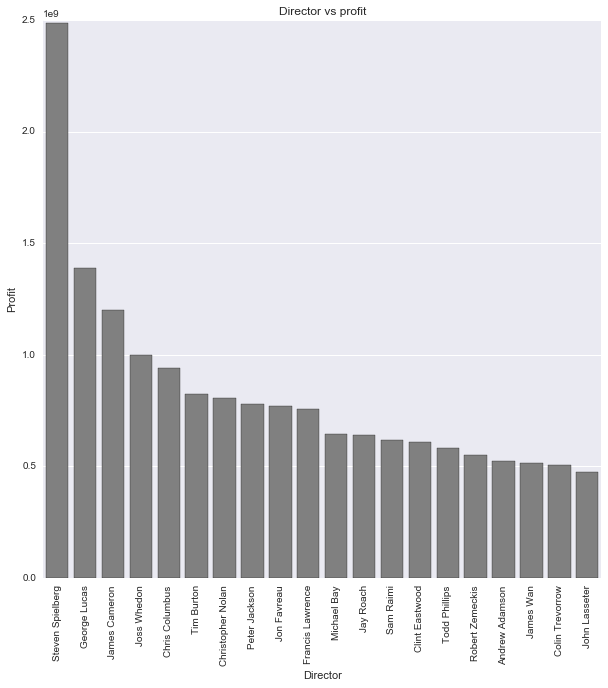

In [20]:
#Analyse the performance of individual directors
#Success of director's movie can be analysed by seeing the profit earned. 

#create new column profit in dataframe which is difference between revenue and budget
data_clean['profit'] = data['gross'] - data['budget']


dir_profit = data_clean.groupby(data['director_name'])['profit'].sum()

dir_profit_index = dir_profit.sort_values(ascending=False)[:20].index
dir_profit_values = dir_profit(ascending=False)[:20].values

fig,ax = plt.subplots(figsize=(10,10))
sns.barplot(x = dir_profit_index,
            y = dir_profit_values,
            color='grey',
            ax=ax)
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

plt.title('Director vs profit')
plt.ylabel('Profit')
plt.xlabel('Director')
del fig,ax,ticks


In [9]:
#Find out the popularity of genres. First check how many movies are produced for each genre
#process genres 

genre_column_values = data_clean['genres'].map(lambda x:x.split('|'))
genre_column_values.head()
#get the list of unique genres in movie dataset


0    [Action, Adventure, Fantasy, Sci-Fi]
1            [Action, Adventure, Fantasy]
2           [Action, Adventure, Thriller]
3                      [Action, Thriller]
5             [Action, Adventure, Sci-Fi]
Name: genres, dtype: object

In [10]:
#create list of unique genres to plot along X-axis

unique_genre= []
for genre in genre_column_values:
    for val in genre:
        if val not in unique_genre:
            unique_genre.append(val)
            
unique_genre

['Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Thriller',
 'Romance',
 'Animation',
 'Comedy',
 'Family',
 'Musical',
 'Mystery',
 'Western',
 'Drama',
 'History',
 'Sport',
 'Crime',
 'Horror',
 'War',
 'Biography',
 'Music',
 'Documentary',
 'Film-Noir']

In [11]:
#now plot genres vs total number of movies in each genrea

#first we have to calculate number of movies associated with each genre. 
#we can do so using for loop below and store genre and count as key value pair in dictionary
genre_count ={}
for value in unique_genre:
    count=0
    for record in genre_column_values:
        if value in record:
            count+=1
    genre_count[value]= count

genre_count

{'Action': 959,
 'Adventure': 781,
 'Animation': 196,
 'Biography': 239,
 'Comedy': 1461,
 'Crime': 709,
 'Documentary': 45,
 'Drama': 1893,
 'Family': 442,
 'Fantasy': 507,
 'Film-Noir': 1,
 'History': 149,
 'Horror': 392,
 'Music': 151,
 'Musical': 96,
 'Mystery': 384,
 'Romance': 859,
 'Sci-Fi': 496,
 'Sport': 148,
 'Thriller': 1117,
 'War': 152,
 'Western': 59}

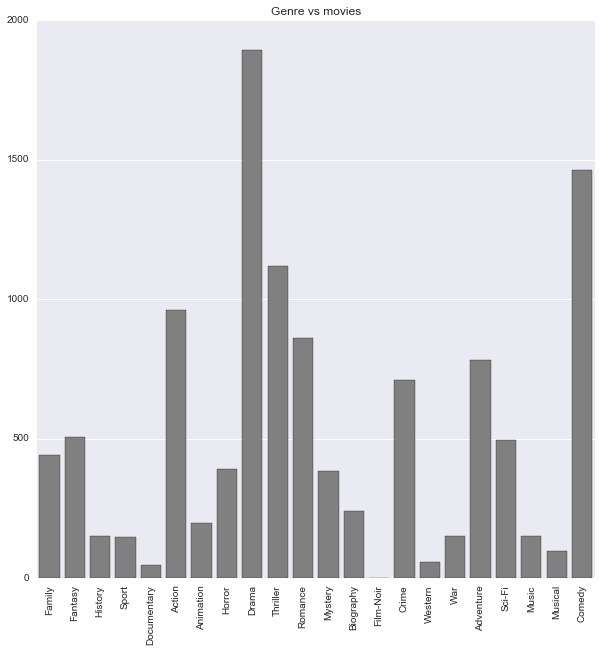

In [19]:
#lets plot this on graph

genre_counter =Counter(genre_count)
genre_indx = np.asarray(list(genre_counter.keys()))
genre_val = np.asarray(list(genre_counter.values()))
fig,ax = plt.subplots(figsize=(10,10))
sns.barplot(x = genre_indx, y = genre_val,color='grey',ax=ax)
plt.title('Genre vs movies')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
del fig,ax,ticks